In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

In [2]:
## part a:

In [3]:
dt_impute = pd.read_csv("Desktop/Diabetes_cleared.csv")

In [4]:
df_impute = pd.DataFrame(dt_impute);
df_impute

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50.0,1.0
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31.0,0.0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32.0,1.0
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0
...,...,...,...,...,...,...,...,...,...
497,2,81.0,72.0,15.0,76.0,30.1,0.547,25.0,0.0
498,7,195.0,70.0,33.0,145.0,25.1,0.163,55.0,1.0
499,6,154.0,74.0,32.0,193.0,29.3,0.839,39.0,0.0
500,2,117.0,90.0,19.0,71.0,25.2,0.313,21.0,0.0


In [5]:
mean_imput = SimpleImputer(missing_values=np.NaN, strategy='mean')

In [6]:
df_impute.Pregnancies = mean_imput.fit_transform(df_impute['Pregnancies'].values.reshape(-1,1))[:,0]
df_impute.Glucose = mean_imput.fit_transform(df_impute['Glucose'].values.reshape(-1,1))[:,0]
df_impute.BloodPressure = mean_imput.fit_transform(df_impute['BloodPressure'].values.reshape(-1,1))[:,0]
df_impute.SkinThickness = mean_imput.fit_transform(df_impute['SkinThickness'].values.reshape(-1,1))[:,0]
df_impute.Insulin = mean_imput.fit_transform(df_impute['Insulin'].values.reshape(-1,1))[:,0]
df_impute.BMI = mean_imput.fit_transform(df_impute['BMI'].values.reshape(-1,1))[:,0]
df_impute.DiabetesPedigreeFunction = mean_imput.fit_transform(df_impute['DiabetesPedigreeFunction'].values.reshape(-1,1))[:,0]
df_impute.Age = mean_imput.fit_transform(df_impute['Age'].values.reshape(-1,1))[:,0]
df_impute.Outcome = mean_imput.fit_transform(df_impute['Outcome'].values.reshape(-1,1))[:,0]
df_impute.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.000000,35.000000,163.513514,33.60000,0.627,50.0,1.0
1,1.0,85.0,66.000000,29.000000,163.513514,26.60000,0.351,31.0,0.0
2,8.0,183.0,64.000000,28.904494,163.513514,23.30000,0.672,32.0,1.0
3,1.0,89.0,66.000000,23.000000,94.000000,28.10000,0.167,21.0,0.0
4,0.0,137.0,40.000000,35.000000,168.000000,43.10000,2.288,33.0,1.0
5,5.0,116.0,74.000000,28.904494,163.513514,25.60000,0.201,30.0,0.0
6,3.0,78.0,50.000000,32.000000,88.000000,31.00000,0.248,26.0,1.0
7,10.0,115.0,72.264706,28.904494,163.513514,35.30000,0.134,29.0,0.0
8,2.0,197.0,70.000000,45.000000,543.000000,30.50000,0.158,53.0,1.0
9,8.0,125.0,96.000000,28.904494,163.513514,32.50752,0.232,54.0,1.0


In [7]:
## part b:

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
def outlier_treatment(datacolumn):
 sorted(datacolumn)
 Q1,Q3 = np.percentile(datacolumn , [25,75])
 IQR = Q3 - Q1
 lower_range = Q1 - (1.5 * IQR)
 upper_range = Q3 + (1.5 * IQR)
 return lower_range,upper_range

In [16]:
lowerbound_preg,upperbound_preg = outlier_treatment(df_impute.Pregnancies)
lowerbound_gluc,upperbound_gluc = outlier_treatment(df_impute.Glucose)
lowerbound_bldp,upperbound_bldp = outlier_treatment(df_impute.BloodPressure)
lowerbound_sknt,upperbound_sknt = outlier_treatment(df_impute.SkinThickness)
lowerbound_insl,upperbound_insl = outlier_treatment(df_impute.Insulin)
lowerbound_bmi,upperbound_bmi = outlier_treatment(df_impute.BMI)
lowerbound_dibt,upperbound_dibt = outlier_treatment(df_impute.DiabetesPedigreeFunction)
lowerbound_age,upperbound_age = outlier_treatment(df_impute.Age)
lowerbound_outc,upperbound_outc = outlier_treatment(df_impute.Outcome)

In [18]:
df_impute[(df_impute.Pregnancies < lowerbound_preg) | (df_impute.Pregnancies > upperbound_preg)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
88,15.0,136.0,70.0,32.0,110.000000,37.1,0.153,43.0,1.0
159,17.0,163.0,72.0,41.0,114.000000,40.9,0.817,47.0,1.0
298,14.0,100.0,78.0,25.0,184.000000,36.6,0.412,46.0,1.0
455,14.0,175.0,62.0,30.0,163.513514,33.6,0.212,38.0,1.0


In [19]:
df_impute[(df_impute.Glucose < lowerbound_gluc) | (df_impute.Glucose > upperbound_gluc)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
374,2.0,300.0,52.0,43.0,158.000000,36.2,0.816,28.0,0.0
384,1.0,12.0,70.0,24.0,110.000000,24.3,0.221,25.0,0.0
386,5.0,250.0,74.0,29.0,163.513514,32.3,0.660,35.0,1.0
402,5.0,800.0,84.0,41.0,88.000000,35.0,0.286,35.0,1.0


In [20]:
df_impute[(df_impute.BloodPressure < lowerbound_bldp) | (df_impute.BloodPressure > upperbound_bldp)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
18,1.0,103.0,30.0,38.000000,83.000000,43.3,0.183,33.0,0.0
43,9.0,171.0,110.0,24.000000,240.000000,45.4,0.721,54.0,1.0
84,5.0,137.0,108.0,28.904494,163.513514,48.8,0.227,37.0,1.0
106,1.0,96.0,122.0,28.904494,163.513514,22.4,0.207,27.0,0.0
125,1.0,88.0,30.0,42.000000,99.000000,55.0,0.496,26.0,1.0
177,0.0,129.0,110.0,46.000000,130.000000,67.1,0.319,26.0,1.0
362,5.0,103.0,108.0,37.000000,163.513514,39.2,0.305,65.0,0.0


In [21]:
df_impute[(df_impute.SkinThickness < lowerbound_sknt) | (df_impute.SkinThickness > upperbound_sknt)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
8,2.0,197.000000,70.0,45.0,543.000000,30.5,0.158,53.000000,1.0
16,0.0,118.000000,84.0,47.0,230.000000,45.8,0.551,31.000000,1.0
32,3.0,88.000000,58.0,11.0,54.000000,24.8,0.267,22.000000,0.0
39,4.0,111.000000,72.0,47.0,207.000000,37.1,1.390,56.000000,1.0
50,1.0,103.000000,80.0,11.0,82.000000,19.4,0.491,22.000000,0.0
55,1.0,73.000000,50.0,10.0,163.513514,23.0,0.248,21.000000,0.0
57,0.0,100.000000,88.0,60.0,110.000000,46.8,0.962,31.000000,0.0
68,1.0,95.000000,66.0,13.0,38.000000,19.6,0.334,25.000000,0.0
80,3.0,113.000000,44.0,13.0,163.513514,22.4,0.140,22.000000,0.0
86,13.0,106.000000,72.0,54.0,163.513514,36.6,0.178,45.000000,0.0


In [22]:
df_impute[(df_impute.Insulin < lowerbound_insl) | (df_impute.Insulin > upperbound_insl)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
8,2.0,197.0,70.0,45.0,543.0,30.5,0.158,53.0,1.000000
13,1.0,189.0,60.0,23.0,846.0,30.1,0.398,59.0,1.000000
16,0.0,118.0,84.0,47.0,230.0,45.8,0.551,31.0,1.000000
20,3.0,126.0,88.0,41.0,235.0,39.3,0.704,27.0,0.000000
31,3.0,158.0,76.0,36.0,245.0,31.6,0.851,28.0,1.000000
...,...,...,...,...,...,...,...,...,...
480,3.0,158.0,70.0,30.0,328.0,35.5,0.344,35.0,0.358149
482,4.0,85.0,58.0,22.0,49.0,27.8,0.306,28.0,0.000000
485,0.0,135.0,68.0,42.0,250.0,42.3,0.365,24.0,1.000000
486,1.0,139.0,62.0,41.0,480.0,40.7,0.536,21.0,0.000000


In [23]:
df_impute[(df_impute.BMI < lowerbound_bmi) | (df_impute.BMI > upperbound_bmi)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
120,0.0,162.0,76.000000,56.000000,100.000000,53.2,0.759,25.0,1.0
125,1.0,88.0,30.000000,42.000000,99.000000,55.0,0.496,26.0,1.0
177,0.0,129.0,110.000000,46.000000,130.000000,67.1,0.319,26.0,1.0
193,11.0,135.0,72.264706,28.904494,163.513514,52.3,0.578,40.0,1.0
247,0.0,165.0,90.000000,33.000000,680.000000,52.3,0.427,23.0,0.0
303,5.0,115.0,98.000000,28.904494,163.513514,52.9,0.209,28.0,1.0
445,0.0,180.0,78.000000,63.000000,14.000000,59.4,2.420,25.0,1.0


In [24]:
df_impute[(df_impute.DiabetesPedigreeFunction < lowerbound_dibt) | (df_impute.DiabetesPedigreeFunction > upperbound_dibt)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
4,0.0,137.000000,40.0,35.000000,168.000000,43.10000,2.288,33.0,1.0
12,10.0,139.000000,80.0,28.904494,163.513514,27.10000,1.441,57.0,0.0
39,4.0,111.000000,72.0,47.000000,207.000000,37.10000,1.390,56.0,1.0
45,0.0,180.000000,66.0,39.000000,163.513514,42.00000,1.893,25.0,1.0
58,0.0,124.109959,82.0,28.904494,163.513514,40.50000,1.781,44.0,0.0
100,1.0,163.000000,72.0,28.904494,163.513514,39.00000,1.222,33.0,1.0
147,2.0,106.000000,64.0,35.000000,119.000000,30.50000,1.400,34.0,0.0
187,1.0,128.000000,98.0,41.000000,58.000000,32.00000,1.321,33.0,1.0
218,5.0,85.000000,74.0,22.000000,163.513514,29.00000,1.224,32.0,1.0
228,4.0,197.000000,70.0,39.000000,744.000000,36.70000,2.329,31.0,0.0


In [25]:
df_impute[(df_impute.Age < lowerbound_age) | (df_impute.Age > upperbound_age)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
123,5.0,132.0,80.000000,28.904494,163.513514,26.8,0.186,69.0,0.000000
129,0.0,105.0,84.000000,28.904494,163.513514,27.9,0.741,62.0,1.000000
148,5.0,147.0,78.000000,28.904494,163.513514,33.7,0.218,65.0,0.000000
221,2.0,158.0,90.000000,28.904494,163.513514,31.6,0.805,66.0,0.358149
263,3.0,142.0,80.000000,15.000000,163.513514,32.4,0.200,63.0,0.000000
294,0.0,161.0,50.000000,28.904494,163.513514,21.9,0.254,65.0,0.000000
361,5.0,158.0,70.000000,28.904494,163.513514,29.8,0.207,63.0,0.000000
362,5.0,103.0,108.000000,37.000000,163.513514,39.2,0.305,65.0,0.000000
363,4.0,146.0,78.000000,28.904494,163.513514,38.5,0.520,67.0,1.000000
390,1.0,100.0,66.000000,29.000000,196.000000,32.0,0.444,99.0,0.000000


In [26]:
df_impute[(df_impute.Outcome < lowerbound_outc) | (df_impute.Outcome > upperbound_outc)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [32]:
## *********** BoxPlot ***********

In [33]:
import seaborn as sns
sns.set_theme(style="whitegrid")

<AxesSubplot:xlabel='Pregnancies'>

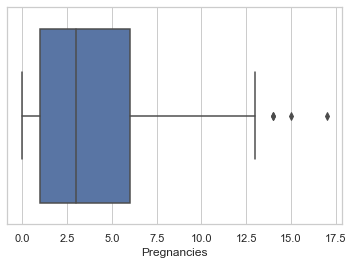

In [34]:
sns.boxplot(x=df_impute["Pregnancies"])

<AxesSubplot:xlabel='Glucose'>

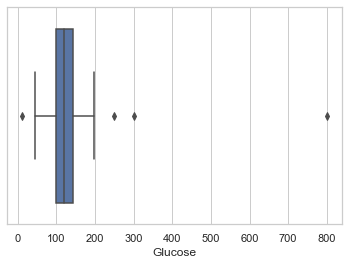

In [35]:
sns.boxplot(x=df_impute["Glucose"])

<AxesSubplot:xlabel='BloodPressure'>

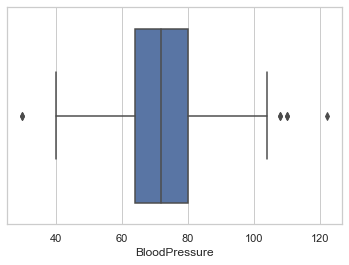

In [36]:
sns.boxplot(x=df_impute["BloodPressure"])

<AxesSubplot:xlabel='SkinThickness'>

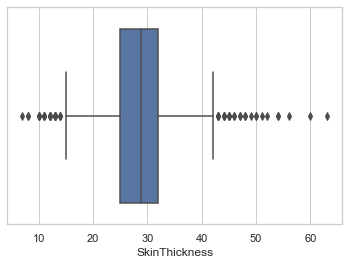

In [37]:
sns.boxplot(x=df_impute["SkinThickness"])

<AxesSubplot:xlabel='Insulin'>

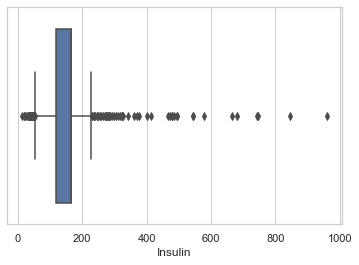

In [38]:
sns.boxplot(x=df_impute["Insulin"])

<AxesSubplot:xlabel='BMI'>

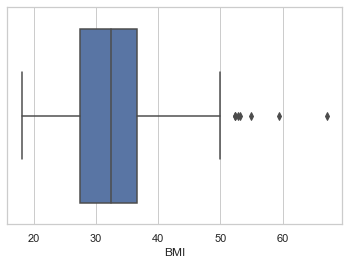

In [39]:
sns.boxplot(x=df_impute["BMI"])

<AxesSubplot:xlabel='DiabetesPedigreeFunction'>

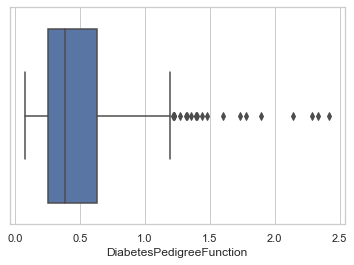

In [40]:
sns.boxplot(x=df_impute["DiabetesPedigreeFunction"])

<AxesSubplot:xlabel='Age'>

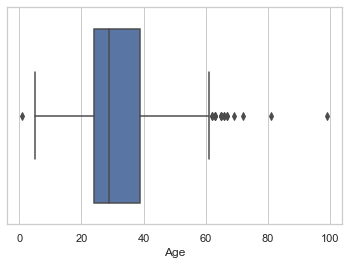

In [41]:
sns.boxplot(x=df_impute["Age"])

<AxesSubplot:xlabel='Outcome'>

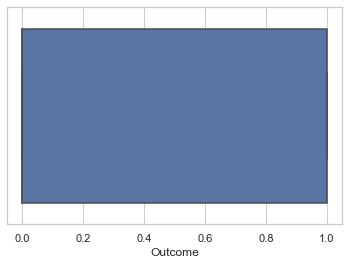

In [42]:
sns.boxplot(x=df_impute["Outcome"])

In [46]:
df_removing1 = df_impute
df_removing1.drop(df_removing1[ (df_removing1.Pregnancies > upperbound_preg) | (df_removing1.Pregnancies < lowerbound_preg) ].index , inplace=True)
df_removing1.drop(df_removing1[ (df_removing1.Glucose > upperbound_gluc) | (df_removing1.Glucose < lowerbound_gluc) ].index , inplace=True)
df_removing1.drop(df_removing1[ (df_removing1.BloodPressure > upperbound_bldp) | (df_removing1.BloodPressure < lowerbound_bldp) ].index , inplace=True)
df_removing1.drop(df_removing1[ (df_removing1.SkinThickness > upperbound_sknt) | (df_removing1.SkinThickness < lowerbound_sknt) ].index , inplace=True)
df_removing1.drop(df_removing1[ (df_removing1.Insulin > upperbound_insl) | (df_removing1.Insulin < lowerbound_insl) ].index , inplace=True)
df_removing1.drop(df_removing1[ (df_removing1.BMI > upperbound_bmi) | (df_removing1.BMI < lowerbound_bmi) ].index , inplace=True)
df_removing1.drop(df_removing1[ (df_removing1.DiabetesPedigreeFunction > upperbound_dibt) | (df_removing1.DiabetesPedigreeFunction < lowerbound_dibt) ].index , inplace=True)
df_removing1.drop(df_removing1[ (df_removing1.Age > upperbound_age) | (df_removing1.Age < lowerbound_age) ].index , inplace=True)
df_removing1.drop(df_removing1[ (df_removing1.Outcome > upperbound_outc) | (df_removing1.Outcome < lowerbound_outc) ].index , inplace=True)
df_removing1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.000000,163.513514,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.000000,163.513514,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,28.904494,163.513514,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.000000,94.000000,28.1,0.167,21.0,0.0
5,5.0,116.0,74.0,28.904494,163.513514,25.6,0.201,30.0,0.0
...,...,...,...,...,...,...,...,...,...
497,2.0,81.0,72.0,15.000000,76.000000,30.1,0.547,25.0,0.0
498,7.0,195.0,70.0,33.000000,145.000000,25.1,0.163,55.0,1.0
499,6.0,154.0,74.0,32.000000,193.000000,29.3,0.839,39.0,0.0
500,2.0,117.0,90.0,19.000000,71.000000,25.2,0.313,21.0,0.0


In [48]:
## part c:

In [66]:
dt_impute_z = pd.read_csv("Desktop/Diabetes_cleared.csv")

In [67]:
df_impute_z = pd.DataFrame(dt_impute_z);
df_impute_z

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50.0,1.0
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31.0,0.0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32.0,1.0
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0
...,...,...,...,...,...,...,...,...,...
497,2,81.0,72.0,15.0,76.0,30.1,0.547,25.0,0.0
498,7,195.0,70.0,33.0,145.0,25.1,0.163,55.0,1.0
499,6,154.0,74.0,32.0,193.0,29.3,0.839,39.0,0.0
500,2,117.0,90.0,19.0,71.0,25.2,0.313,21.0,0.0


In [68]:
mean_imput_z = SimpleImputer(missing_values=np.NaN, strategy='mean')

In [69]:
df_impute_z.Pregnancies = mean_imput_z.fit_transform(df_impute_z['Pregnancies'].values.reshape(-1,1))[:,0]
df_impute_z.Glucose = mean_imput_z.fit_transform(df_impute_z['Glucose'].values.reshape(-1,1))[:,0]
df_impute_z.BloodPressure = mean_imput_z.fit_transform(df_impute_z['BloodPressure'].values.reshape(-1,1))[:,0]
df_impute_z.SkinThickness = mean_imput_z.fit_transform(df_impute_z['SkinThickness'].values.reshape(-1,1))[:,0]
df_impute_z.Insulin = mean_imput_z.fit_transform(df_impute_z['Insulin'].values.reshape(-1,1))[:,0]
df_impute_z.BMI = mean_imput_z.fit_transform(df_impute_z['BMI'].values.reshape(-1,1))[:,0]
df_impute_z.DiabetesPedigreeFunction = mean_imput_z.fit_transform(df_impute_z['DiabetesPedigreeFunction'].values.reshape(-1,1))[:,0]
df_impute_z.Age = mean_imput_z.fit_transform(df_impute_z['Age'].values.reshape(-1,1))[:,0]
df_impute_z.Outcome = mean_imput_z.fit_transform(df_impute_z['Outcome'].values.reshape(-1,1))[:,0]
df_impute_z.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.000000,35.000000,163.513514,33.60000,0.627,50.0,1.0
1,1.0,85.0,66.000000,29.000000,163.513514,26.60000,0.351,31.0,0.0
2,8.0,183.0,64.000000,28.904494,163.513514,23.30000,0.672,32.0,1.0
3,1.0,89.0,66.000000,23.000000,94.000000,28.10000,0.167,21.0,0.0
4,0.0,137.0,40.000000,35.000000,168.000000,43.10000,2.288,33.0,1.0
5,5.0,116.0,74.000000,28.904494,163.513514,25.60000,0.201,30.0,0.0
6,3.0,78.0,50.000000,32.000000,88.000000,31.00000,0.248,26.0,1.0
7,10.0,115.0,72.264706,28.904494,163.513514,35.30000,0.134,29.0,0.0
8,2.0,197.0,70.000000,45.000000,543.000000,30.50000,0.158,53.0,1.0
9,8.0,125.0,96.000000,28.904494,163.513514,32.50752,0.232,54.0,1.0


In [70]:
from scipy import stats

In [71]:
df_removing2 = df_impute_z
df_removing2.drop(df_removing2[ (stats.zscore(df_impute_z['Pregnancies']) > 3) | (stats.zscore(df_impute_z['Pregnancies']) < -3) ].index , inplace=True)
df_removing2.drop(df_removing2[ (stats.zscore(df_impute_z['Glucose']) > 3) | (stats.zscore(df_impute_z['Glucose']) < -3) ].index , inplace=True)
df_removing2.drop(df_removing2[ (stats.zscore(df_impute_z['BloodPressure']) > 3) | (stats.zscore(df_impute_z['BloodPressure']) < -3) ].index , inplace=True)
df_removing2.drop(df_removing2[ (stats.zscore(df_impute_z['SkinThickness']) > 3) | (stats.zscore(df_impute_z['SkinThickness']) < -3) ].index , inplace=True)
df_removing2.drop(df_removing2[ (stats.zscore(df_impute_z['Insulin']) > 3) | (stats.zscore(df_impute_z['Insulin']) < -3) ].index , inplace=True)
df_removing2.drop(df_removing2[ (stats.zscore(df_impute_z['BMI']) > 3) | (stats.zscore(df_impute_z['BMI']) < -3) ].index , inplace=True)
df_removing2.drop(df_removing2[ (stats.zscore(df_impute_z['DiabetesPedigreeFunction']) > 3) | (stats.zscore(df_impute_z['DiabetesPedigreeFunction']) < -3) ].index , inplace=True)
df_removing2.drop(df_removing2[ (stats.zscore(df_impute_z['Age']) > 3) | (stats.zscore(df_impute_z['Age']) < -3) ].index , inplace=True)
df_removing2.drop(df_removing2[ (stats.zscore(df_impute_z['Outcome']) > 3) | (stats.zscore(df_impute_z['Outcome']) < -3) ].index , inplace=True)
df_removing2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.000000,163.513514,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.000000,163.513514,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,28.904494,163.513514,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.000000,94.000000,28.1,0.167,21.0,0.0
5,5.0,116.0,74.0,28.904494,163.513514,25.6,0.201,30.0,0.0
...,...,...,...,...,...,...,...,...,...
497,2.0,81.0,72.0,15.000000,76.000000,30.1,0.547,25.0,0.0
498,7.0,195.0,70.0,33.000000,145.000000,25.1,0.163,55.0,1.0
499,6.0,154.0,74.0,32.000000,193.000000,29.3,0.839,39.0,0.0
500,2.0,117.0,90.0,19.000000,71.000000,25.2,0.313,21.0,0.0
